신경망 학습에서는 현재의 상태를 "하나의 지표"로 표현한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이다. 신경망은 "하나의 지표"를 기준으로 최적의 매개변수 값을 탐색한다. 신경망 함수에서 사용하는 지표는 "손실 함수(Loss Function)"라고 한다. 이 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용한다.

# 4.2.1 오차제곱합(Sum of Squares for Error)

가장 많이 쓰이는 손실 함수는 "오차제곱합(Sum of Squares for Error, SSE)"이다. 수식으로는 다음과 같다.

$
E = 
\frac{1}{2}\sum_{k} (y_k - t_k)^2
\qquad$ [식 4.1]

여기서 $y_k$는 신경망의 출력(신경망이 추정한 값), $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타낸다.<br>
앞서서 한 "손글씨 숫자 인식"의 예에서는 $y_k 와 t_k$는 각각

$
y_k = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] \\
t_k = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
$

가 된다.

이 배열들의 원소는 첫 번째 인덱스부터 순서대로 숫자 "0", "1", "2", ...일 때의 값이다. 여기서 출력 $y$는 소프트맥스 함수의 출력 값이다. 소프트맥스의 함수의 출력 값은 확률로 해석할 수 있으므로, 이 예에서는 이미지가 "0"일 확률은 "0.1(10%)", "1"일 확률은 "0.05(5%)", "2"일 확률은 "0.6(60%)"가 된다. 이는 정답 레이블이 실제 숫자는 "2"임을 알려준다. 위의 $t_k$처럼 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법을 원-핫-인코딩이라고 한다.<br>
이 오차제곱합을 파이썬으로 구현해보자.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sum_squares_error(y, t):
    sse = 0.5 * np.sum((y-t)**2)
    
    return sse

In [3]:
# 정답 레이블
t_k = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex1) 숫자 "2"일 확률이 가장 높다고 판단한 경우
y_k = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y_k), np.array(t_k)))

# ex2) 숫자 "7"일 확률이 가장 높다고 판단한 경우
y_k = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y_k), np.array(t_k)))

0.09750000000000003
0.5975


첫 번째 예는 정답이 "2"이고, 신경망의 출력도 "2"에서 가장 높은 경우이다. 두 번째 예에서는 정답은 똑같이 "2"이지만, 신경망의 출력은 "7"에서 가장 높다. 따라서 각 오차제곱합의 값을 비교하면 정답을 맞춘 첫 번재 경우에 더 작고, 더 정답에 가까울 것으로 추측된다.

# 4.2.2 교차 엔트로피 오차

또 다른 손실 함수로서 "교차 엔트로피 오차(Cross Entropy Error, CEE)"도 자주 이용한다. 교차 엔트로피 오차의 수식은 다음과 같다.

$
E = 
-\sum_{k} t_k\ln y_k
\qquad$ [식 4.2]

마찬가지로 $y_k$는 신경망의 출력값, $t_k$는 정답 레이블이다. 그리고 $t_k$는 원-핫-인코딩이 되어 있다. 따라서 실제로는 수식에서 정답의 출력값만을 자연로그로 계산하게 된다. 예를 들어, 정답 레이블이 "2"에서 1이고, 이 때의 출력값이 0.6이라면, 교차 엔트로피 오차는 $-\ln {0.6} = 0.51$이 된다. 같은 조건에서 신경망 출력이 0.1이라면 오차는 $-\ln {0.1} = 2.30$이 된다.

밑에 자연로그의 그래프를 그려두었다.

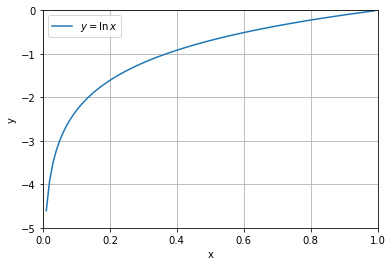

In [4]:
x = np.arange(0.01, 1, 0.01)
y = np.log(x)

plt.plot(x, y, label="$y = \ln x$")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0.0, 1.0)
plt.ylim(-5.0, 0.0)
plt.legend()
plt.grid()
plt.show()

이 그림에서 보이듯이 $x$가 1일 때 $y$는 0이 되고, $x$가 0에 가까워질 수록, $y$의 값은 작아진다. 한마디로 오차가 커진다.<br>
이를 구현해보자

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7    ## delta는 y = 0일 때를 대비하여 작은 값을 넣어준다.
    cee = -np.sum(t*np.log(y+delta))

    return cee

In [6]:
# 정답 레이블
t_k = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex1) 숫자 "2"일 확률이 가장 높다고 판단한 경우
y_k = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y_k), np.array(t_k)))

# ex2) 숫자 "7"일 확률이 가장 높다고 판단한 경우
y_k = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y_k), np.array(t_k)))

0.510825457099338
2.3025840929945454


이는 앞서 구한 오차제곱합의 판단과 일치한다.

# 4.2.3 미니배치 학습

앞서서 까지는 하나의 훈련 데이터에 관한 손실 함수만을 생각하였으니, 모든 훈련 데이터에 관한 손실 함수를 구하는 방법을 생각해보자. 예를 들어, 교차 엔트로피 오차의 경우는 [식 4.3]과 같이 된다.

$
E = 
-\frac{1}{N} \sum_{n} \sum_{k} t_nk\ln y_nk
\qquad$ [식 4.3]

이때 데이터가 N개 라면 $t_nk$는 n번째 데이터의 k번째 값을 의미한다. 복잡해 보이지만, 그저 각 데이터의 손실 함수의 평균을 구하는 것 뿐이다. 그런데 MNIST의 데이터셋은 훈련 데이터가 60,000개가 있었다. 그래서 모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 좀 걸린다. 더 나아가 빅데이터 수준이 되면 그 수는 수백만에서 수천만도 넘는 거대한 값이 되기도 한다. 이 많은 데이터를 대상으로 일일이 손실 함수를 계산하는 것은 현실적이지 않다. 이런 경우 데이터 일부를 추려 전체의 "근사치"로 이용할 수 있다. 신경망 학습에서도 훈련 데이터로부터 일부만 골라 학습을 수행한다. 이 일부를 "미니배치(mini-batch)"라고 한다. 가령 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장만을 사용하여 학습하는 것이다.<br>
이제 부터 미니배치 학습을 구현해보자.

In [10]:
import sys, os
sys.path.append(os.pardir)
from source.dataset.mnist import load_mnist

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0] ## 60,000
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

이렇게 하면 60,000장의 데이터셋 중에서 10장의 데이터를 무작위로 빼내올 수 있다.

# 4.2.4 교차 엔트로피 오차 구현하기

In [30]:
def cross_entropy_error(y, t):
    if y.ndim == 1:    ## 데이터가 하나인 경우
        y = y.reshape(1, y.size)
        batch_size = y.shape[0]
        
        if t.ndim == 1:    ## one_hot_label=False 인 경우
            t = t.reshape(1, t.size)
            cee = -np.sum(np.log(y[np.arange(batch_size), t]+1e-7)) / batch_size
    
        else:
            t = t.reshape(1, t.size)
            cee = -np.sum(t*np.log(y+1e-7)) / batch_size
            
    return cee

# 4.2.5 왜 손실 함수를 설정하는가?

왜 굳이 손실 함수를 사용해야 하는 걸까?

예컨대 숫자 인식의 경우도 우리의 궁극적인 목적은 높은 "정확도"를 끌어내는 매개변수 값을 찾아내는 것이었다. 그렇다면 "정확도"라는 지표를 놔두고 "손실 함수의 값"이라는 우회적인 방법을 택하는 이유는 무엇일까?

이 의문은 신경망 학습에서의 "미분"의 역할에 주목한다면 해결된다. 신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다. 이때 매개변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.

가령 여기에 가상의 신경망이 있고 그 신경망의 어느 한 가중치 매개변수에 주목한다고 하자. 이때 그 가중치 매개변수의 손실 함수의 미분이란, "가중치 매개변수의값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나"라는 의미이다. 만약 이 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다. 반대의 경우에는 양의 방향으로 움직여 손실 함수의 값을 줄인다. 그리고 미분 값이 0일 경우에는 갱신을 종료한다.

정화도를 지표로 삼어서는 안 되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다. 
정리하자면,
### 신경망을 학습할 때 정확도를 지표로 삼어서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.

정확도를 지표로 삼으면 매개변수의 미분이 대부분의 장소에서 0이 되는 이유는 무엇일까? 구체적인 예를 들어보자.

한 신경망이 100장의 훈련 데이터 중 32장을 올바르게 인식한다고 하자. 그렇다면 정확도는 32%이다. 만약 정확도가 지표였다면 가중치 매개변수의 값을 조금 바꾼다고 해도 정확도는 그대로 32%일 것이다. 즉 매개변수를 약간만 조정해서는 정확도가 개선되지 않고 일정하게 유지된다. 혹여나 정확도가 개선되더라도 그 값은 불연속적인 띄엄띄엄한 값으로 변화한다.

이는 활성화 함수로서 계단 함수가 아닌 시그모이드 함수를 사용하는 이유와 일치한다.<br>
<img src=images/4_04.png height=200px width=600px>

시그모이드 함수는 어느 장소더라도 미분 값이 0이 되지 않는다. 이는 신경망 학습에서 중요한 성질으로, 기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습할 수 있다.